In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

# Data Analysis

In [7]:
white = pd.read_csv('winequality-white.csv', delimiter=';')
red = pd.read_csv('winequality-red.csv', delimiter=';')

In [8]:
print('White wines')
print(white.head())
print('Red wines')
print(red.head())

White wines
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10

In [9]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Heatmaps
Use sb.heatmap from seaborn to easily create heatmaps

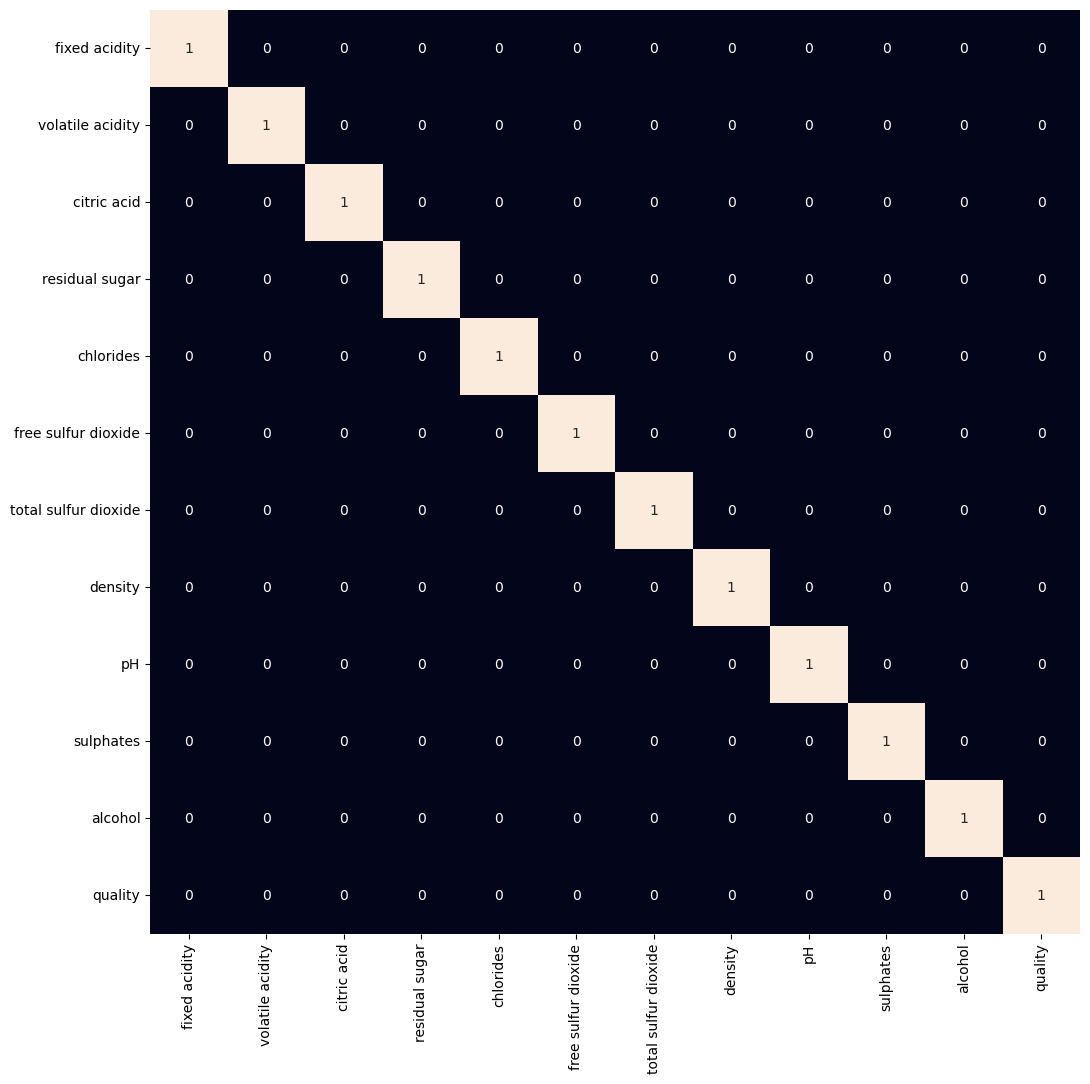

In [11]:
plt.figure(figsize=(12, 12))
sb.heatmap(red.corr() > 0.7, annot=True, cbar=False)
plt.show()

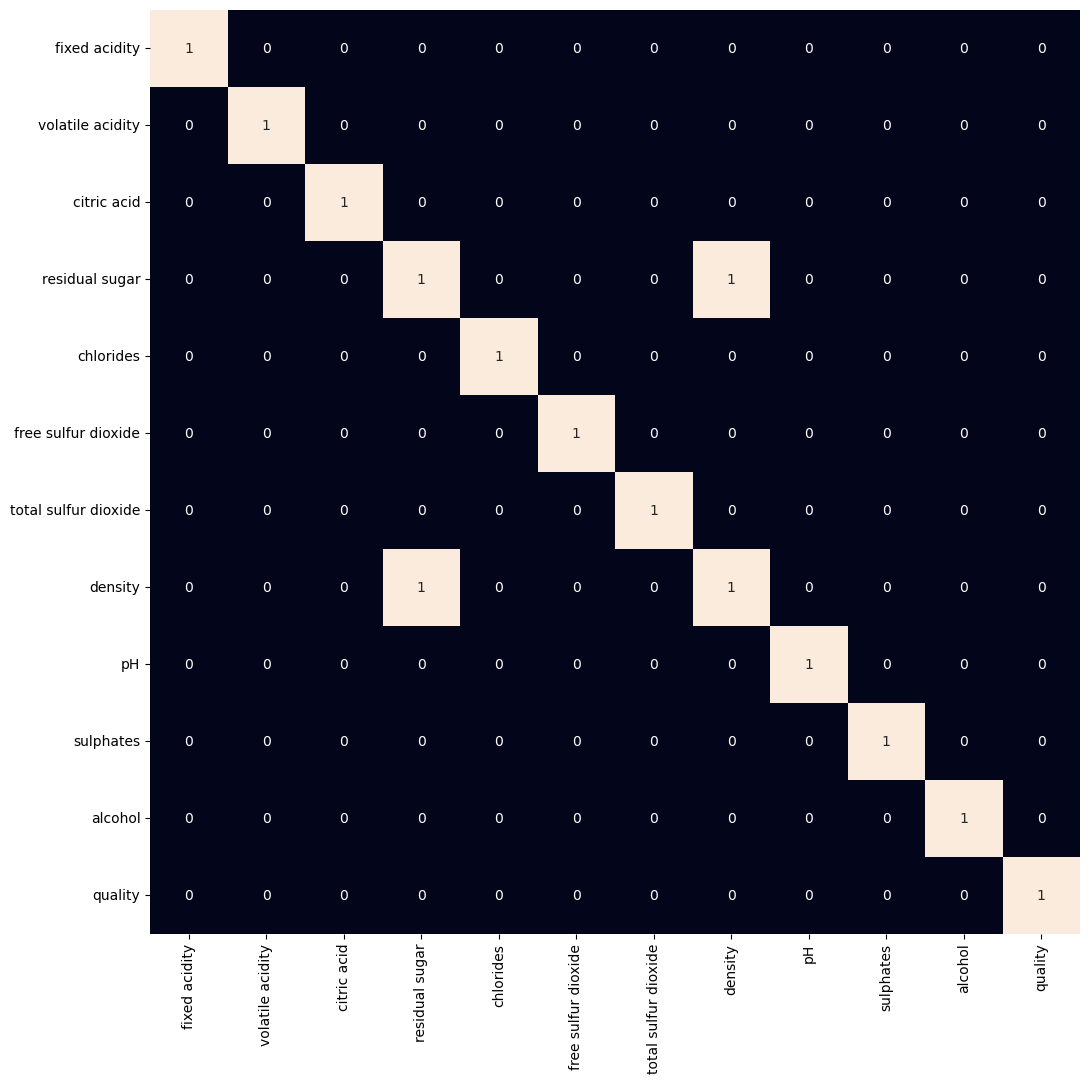

In [12]:
plt.figure(figsize=(12, 12))
sb.heatmap(white.corr() > 0.7, annot=True, cbar=False)
plt.show()

## Histogram
Use pd.hist() to plot histogram easily from dataframe

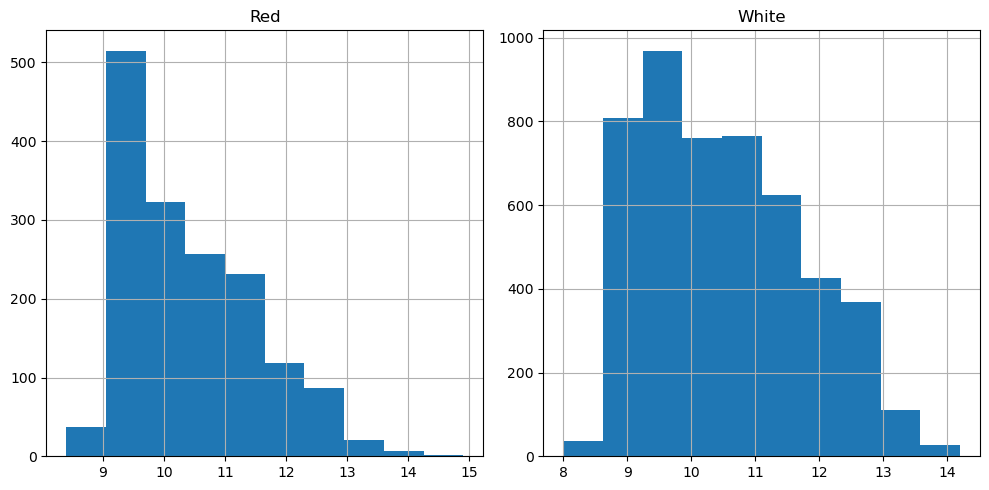

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
red.hist(ax=axes[0],
         column=['alcohol'],
          bins=10)
axes[0].set_title('Red')

white.hist(ax=axes[1],
           column=['alcohol'],
          bins=10)
axes[1].set_title('White')

plt.tight_layout()
plt.show()

# Data Splitting

In [14]:
# Add `type` column to `white` with value zero
red['type'] = 1

# Add `type` column to `white` with value zero
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
# combine the two dataframes

In [15]:
wines.shape

(6497, 13)

In [16]:
print(wines.head())
#print(wines.tail())
from sklearn.model_selection import train_test_split

# quality column will not be used
X = wines.iloc[:, 0:11]
y = np.ravel(wines.type)
# ravel() is necessary to have appropriate dimensions

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=45
)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8        5     1  
2 

# Model Training and Prediction

In [17]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(12, activation ='relu', input_shape =(11, )))

# Add one hidden layer
model.add(Dense(9, activation ='relu'))

# Add an output layer
model.add(Dense(1, activation ='sigmoid'))

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy', 
  optimizer ='adam', metrics =['accuracy'])

c:\Users\fycce\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training Model
model.fit(X_train, y_train, epochs = 5,
           batch_size = 1, verbose = 1)
 
# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

Epoch 1/3
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8581 - loss: 0.7577
Epoch 2/3
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9275 - loss: 0.2410
Epoch 3/3
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9404 - loss: 0.1851
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.00224399]
 [0.02618405]
 [0.00231289]
 ...
 [0.8669306 ]
 [0.04553809]
 [0.00393105]]


# ADD MORE BY CONFUSION MATRIX OR SOMETHING SIMILAR